# Logistic Regression

Linear regression allows to model relationships between **continuos independent and dependent variables** and **between qualitative independent variables and continuous variables**. However, it does not allow to model relationships between continuous or qualitative independent variables and **qualitative dependent variables**.

## Example Data
Establishing such relationships is useful in different contexts. For instance, let us consider the [Breast Cancer Wisconsin](https://archive.ics.uci.edu/dataset/17/breast+cancer+wisconsin+diagnostic) dataset:

In [4]:
from ucimlrepo import fetch_ucirepo 
from matplotlib import pyplot as plt
  
# fetch dataset 
breast_cancer_wisconsin_diagnostic = fetch_ucirepo(id=17) 
  
# data (as pandas dataframes) 
X = breast_cancer_wisconsin_diagnostic.data.features 
y = breast_cancer_wisconsin_diagnostic.data.targets 

data = X.join(y)
data

,radius1,texture1,perimeter1,area1,smoothness1,compactness1,concavity1,concave_points1,symmetry1,fractal_dimension1,...,texture3,perimeter3,area3,smoothness3,compactness3,concavity3,concave_points3,symmetry3,fractal_dimension3,Diagnosis
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,M
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,M
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,M
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,M
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,M
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,M
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,M
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,M
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,M


The dataset contains several measurements of given quantities measured from digitized image of a fine needle aspirate (FNA) of a breast mass, together with a categorical variable `Diagnosis` with two levels: `M` (malignant) and `B` (benign).

In this case, it would be good to be able to study whether a relationship exists between some of the considered independent variables and the dependent variable. 

We will consider the `radius1` variable for the moment. Let us plot this variable with respect to `Diagnosis`:

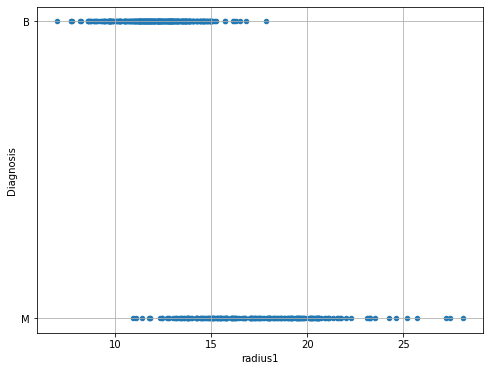

In [5]:
data.plot.scatter(x='radius1',y='Diagnosis', figsize=(8,6))
plt.grid()
plt.show()

From the plot above, we can note that there is some form of relationship between the two variables. Indeed:
* For low values of `radius1`, we tend to have more benign cases;
* For large values of `radius1`, we tend to have more malignant cases.

## Limits of Linear Regression
Of course, we would like to quantify this relationship in a more formal way.
**As in the case of a linear regressor, we want to define a model which can predict the independent variable $y$ from the dependent variables $x_i$. If such model gives good predictions, than we can trust its interpretation as a means of studying the relationship between the variables.**

We can think of converting `B => 1` and `M => 0`, and then compute a linear regressor:

$$Diagnosis = \beta_0 + \beta_1 radius1$$

This would be the result:

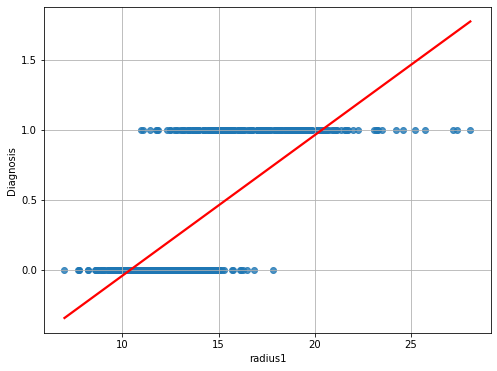

In [6]:
import seaborn as sns
data['Diagnosis']=data['Diagnosis'].replace({'B':0,'M':1})
plt.figure(figsize=(8,6))
sns.regplot(x=data['radius1'],y=data['Diagnosis'], ci=None, line_kws={'color':'red'})
plt.grid()
plt.show()

We can immediately see that this function does not model the relationship between the two variables very well. While we obtain a statistically relevant regressor with $R^2=0.533$ and statistically relevant coefficients, the residual plot will look like this:

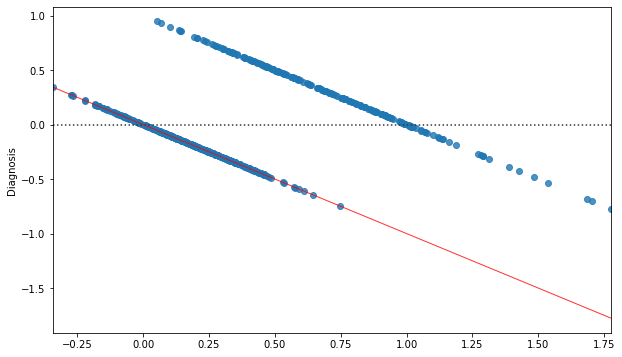

In [7]:
from statsmodels.formula.api import ols
import statsmodels.api as sm
#ols("Diagnosis ~ radius1", data).fit().summary()
fitted=ols("Diagnosis ~ radius1", data).fit().fittedvalues
plt.figure(figsize=(10,6))
sns.residplot(x=fitted, y='Diagnosis', data=data.dropna(),lowess=True,line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8})
plt.show()

The correlation between the residuals and the independent variable is a strong indication that the true relationship between the two variables is not correcly modeled. After all, from a purely predictive point of view, we are using a linear regressor which takes the form:

$$f:\mathbb{R} \to \mathbb{R}$$

while the values `Diagnosis` variable belong to the set $\{0,1\}$ and we would need instead a function with the following form:

$$f:\mathbb{R} \to \{0,1\}$$

However, the linear regressor cannot directly predict **discrete values**. 

**In practice, while with a linear regressor we wanted to predict continuous values, now we want to assign observations $\mathbf{x}$ to discrete bins (in this case only two possible ones). As we will better study later in the course, this problem is known as classification.**

## From Binary Values to Probabilities
If we want to model some form of continuous value, we could think to transition from $\{0,1\}$ to $[0,1]$ using probabilities, which is a way to turn discretized values to "soft" values indicating our belief in the fact that `Diagnosis` will take either a $0$ or $1$ value. We could hence think to model the following probability, rather than modeling `Diagnosis` directly:

$$P(Diagnosis=1| radius1)$$

However, even in this case, a model of the form:

$$P(Diagnosis=1|radius1) = \beta_0 + \beta_1 radius1$$

Would not be appropriate. Indeed, while $P(Diagnosis=1| radius1)$ needs to be in the $[0,1]$ range, the linear combination $\beta_0 + \beta_1 radius1$ will naturally output values **smaller than $0$** and **larger than $1$**. How should we interpret such values?

Intuitively, we would expect to $P(Diagnosis=1| radius1)$ to assume values in the $[0,1]$ range for intermediate values (say `radius` $\in [10,20]$), while for extremely low values of (say `radius` $<10$) the probability **should saturate to $0$** and for extremely large values (say `radius` $>20$) the probability should saturate to 1.

when `radius1` takes large values (say larger than $20$), we expect **probability to saturate to $1$**.

In practice, we would expect a result similar to the following:

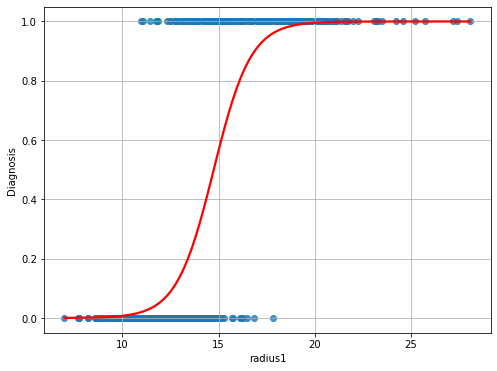

In [8]:
plt.figure(figsize=(8,6))
sns.regplot(x=data['radius1'],y=data['Diagnosis'], logistic=True, ci=None, line_kws={'color':'red'})
plt.grid()
plt.show()

As can be noted, the function above is not linear, and hence it cannot be fit with a linear regressor. However, we have seen that a linear regressor can be tweaked to also represent nonlinear functions.

## The Logistic Function
Similarly to polynomial regression, we need to find a **transformation of the formulation of the linear regressor to transform its output into a nonlinear function of the independent variables**. Of course, we do not want *any* transformation, but one that has the previously highlighted properties. While different functions have similar characteristics, in practice the **logistic function has some nice properties that, as we will se in a moment, allow to easily interpret the resulting model in a probabilistic way**. The logistic function is defined as:

$$f(x) = \frac{1}{1+e^{-x}}$$

and has the following shape:

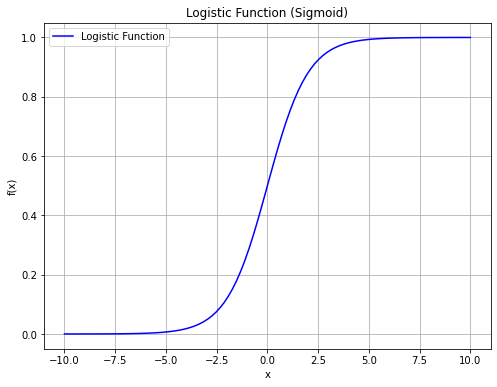

In [9]:
import numpy as np
import matplotlib.pyplot as plt

# Define the logistic (sigmoid) function
def logistic_function(x):
    return 1 / (1 + np.exp(-x))

# Generate x values
x = np.linspace(-10, 10, 100)  # Creating 100 evenly spaced values from -6 to 6

# Calculate y values using the logistic function
y = logistic_function(x)

# Plot the logistic function
plt.figure(figsize=(8, 6))
plt.plot(x, y, label='Logistic Function', color='blue')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.title('Logistic Function (Sigmoid)')
plt.grid()
plt.legend()
plt.show()


As we can see, the function has the properties we need:
* Its values are comprised between $0$ and $1$;
* It saturates to $0$ and $1$ for extreme values of $x$.

## The Logistic Regression Model
In practice, we define our model, **the logistic regressor model** as follows (**simple logistic regression**):

$$P(Diagnosis=1|X) = f(\beta_0 + \beta_1 X) = \frac{1}{1+e^{-(\beta_0 + \beta_1 X)}}$$

Or, more in general (**multiple logistic regression**):

$$P(y=1|\mathbf{x}) = \frac{1}{1+e^{-(\beta_0 + \beta_1 x_1 + \ldots + \beta_n x_n)}}$$

It is easy to see that:

$$p=\frac{1}{1+e^{-x}} \Rightarrow p+pe^{-x} = 1 \Rightarrow pe^{-x} = 1-p \Rightarrow e^{-x} = \frac{1-p}{p} \Rightarrow e^{x} = \frac{p}{1-p}$$

Hence:

$$e^{\beta_0+\beta_1x_1 + \ldots + \beta_nx_n} = \frac{P(y=1|\mathbf{x})}{1-P(y=1|\mathbf{x})}$$

We note that the term on the right is the odd of $P(y=1|\mathbf{x})$. We recall that the odd of $P(y=1|\mathbf{x})$ is the number of times we believe the example will be positive (observed $\mathbf{x}$) over the number of times we believe the example will be negative. For instance, if we believe that the example will be positive $3$ times out of $10$, then the odd will be $\frac{3}{7}$.

By taking the logarithm of both terms, we obtain:

$$\log \left(\frac{P(y=1|\mathbf{x})}{1-P(y=1|\mathbf{x})}\right) = \beta_0 + \beta_1 x_1 + \ldots + \beta_n x_n$$

The expression:

$$\log \left(\frac{P(y=1|\mathbf{x})}{1-P(y=1|\mathbf{x})}\right)$$

Is the logarithm of the odd (log odd), and it is called **logit**, hence the **logistic regression** is sometimes called **logit regression**.


The expression above shows how a logistic regressor can be seen as **a linear regressor (the expression on the right side of the equation) on the logit (the log odd)**. This paves the way to useful interpretations of the model, as shown in the next section.

## Statistical Interpretation of the Coefficients of a Linear Regressor

Let's now see how to interpret the coefficients of a logistic regressor. Remember that the regression model (in the case of simple logistic regression) is as follows:

$$
\log(\frac{p}{1-p})=\beta_0 + \beta_1 x
$$

Applying what we know about linear regressors, we can write:

$$x=0 \Rightarrow \ln(\frac{p}{1-p})=\beta_0$$ 

To have a clearer picture, we can exponentiate both sides of the equation and write: 

$$x=0 \Rightarrow \frac{p}{1-p}=e^{\beta_0}$$ 

Remember that $\frac{p}{1-p}$ is the odds that the dependent variable is equal to 1 when observing $x$ and, as such, it has a clear interpretation. For example, if the odds of an event are $\frac{3}{1}$, then it is $3$ times more likely to occur than not to occur. So, **for $x=0$, it is $e^{\beta_0}$ times more likely that the dependent variable is equal to 1, rather than being equal to 0**.

It can be seen that:

$$p=\frac{odds}{1+odds}$$

Hence, the probability of the event being true when all variables are zero is given by:

$$p(y=1|x) = \frac{e^\beta_0}{1+e^\beta_0}$$

How can we interpret the **coefficient values**? 

We know that:

$$odds(p|x) = \frac{P(y=1|x)}{1-P(y=1|x)}$$

We can write:

$$
\log odds(p|x) = \beta_0 + \beta_1 x
$$

Hence:

$$\log odds(p|x+1) - \log odds(p|x) = \beta_0 + \beta_1 (x+1) - \beta_0 - \beta_1 x = \beta_1 (x+1) - \beta_1 x = \beta_1$$

Exponentiating both sides, we get:

$$e^{\log odds(p|x+1) - \log odds(p|x)} = e^{\beta_1} \Rightarrow \frac{e^{\log odds(p|x+1)}}{e^{\log odds(p|x)}} = e^{\beta_1} \Rightarrow \frac{odds(p|x+1)}{odds(p|x)} = e^{\beta_1} \Rightarrow odds(p|x+1) = e^{\beta_1}odds(p|x)$$

We can thus say that **increasing the variable $x$ by one unit corresponds to a multiplicative increase in odds by $e^{\beta_1}$**.

This analysis can be easily extended to the case of a multiple logistic regressor. Hence in general, given the model:

$$P(y=1|\mathbf{x}) = \beta_0 + \beta_1 x_1 + \ldots + \beta_n x_n$$

We can say that:

* $e^\beta_0$ is the odd of $y$ being equal to $1$ rather than $0$ when $x_i=0 \forall i$;
* An increment of one unit in the independent variable $x_i$ corresponds to a multiplicative increment of $e^\beta_i$ in the odds of $y=1$. So if $e^\beta_i=0.05$, then $y=1$ is $5\%$ more likely for a one-unit increment of $x$.

## Geometrical Interpretation of the Coefficients of a Linear Regressor
Similar to linear regression, also the coefficients of logistic
regression have a geometrical interpretation. We will see that, while
linear regression finds a «curve» that fits the data, logistic
regression finds a hyperplane that separates the data.

Let us consider a simple example with bi-dimensional data
$\mathbf{x} \in \mathfrak{R}^{2}$ as the one shown in the following:

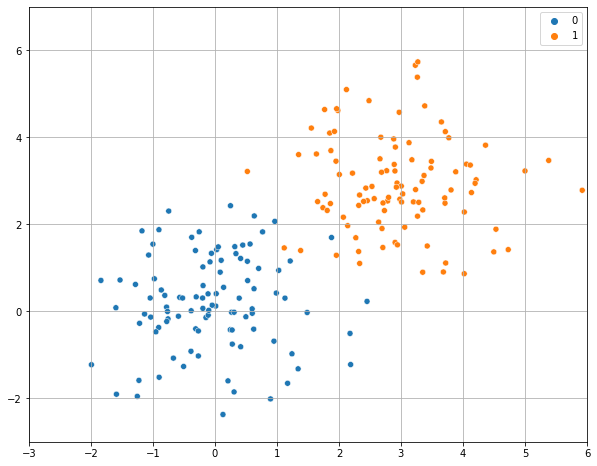

In [10]:
import numpy as np
x=np.array(list(np.random.normal(0,1,100))+list(np.random.normal(3,1,100)))
y=np.array(list(np.random.normal(0,1,100))+list(np.random.normal(3,1,100)))
l=np.array([0]*100+[1]*100)
plt.figure(figsize=(10,8))
sns.scatterplot(x=x,y=y,hue=l)
plt.xlim([-3,6])
plt.ylim([-3,7])
plt.legend()
plt.grid()
plt.show()

Let us assume that we fit a logistic regressor model to this data

$$P\left( y=1 | \mathbf{x} \right) = \frac{1}{1 + e^{- {(\beta}_{0} + \beta_{1}x_{1} + \beta_{2}x_{2})}}$$

and find the following values for the parameters:

$$\left\{ \begin{matrix}
\beta_{0} = - 3.47 \\
\beta_{1} = 1.17 \\
\beta_{2} = 1.43 \\
\end{matrix} \right.\ $$

We know that these parameters allow to find a probability value according to the formula above.
We can use these values to **classify the observations** $\mathbf{x}$. In practice, a reasonable criterion to classify observations would be:

$$\hat y = \begin{cases}1 & \text{if } P(y=1|\mathbf{x}) \geq 0.5\\0 & \text{otherwise}\end{cases}$$

This makes sense as we are assigning the observations to the group for which the posterior probability $P(y|\mathbf{x})$ is higher. 

To understand how the data is classified, we can look at those points in
which the classifier is uncertain, which is often called **the decision boundary**, i.e.,
those points in which $P\left( y=1 | \mathbf{x} \right) = 0.5$.

We note that:

$$P\left(y=1 | \mathbf{x} \right) = 0.5 \Leftrightarrow e^{- (\beta_{0} + \beta_{1}x_{1} + \beta_{2}x_{2})} = 1 \Leftrightarrow 0 = \beta_{0} + \beta_{1}x_{1} + \beta_{2}x_{2}$$

This last equation is the equation of a line (in the form
$ax + by + c = 0$). We can see it in explicit form:

$$x_{2} = - \frac{\beta_{1}}{\beta_{2}}x_{1} - \frac{\beta_{0}}{\beta_{2}}$$

So, we have found a line which has a

-   Angular coefficient equal to $- \frac{\beta_{1}}{\beta_{2}}$;

-   Intercept equal to $- \frac{\beta_{0}}{\beta_{2}}$;

If we plot this line, we obtain the **decision boundary** which
separates the elements from the two classes:

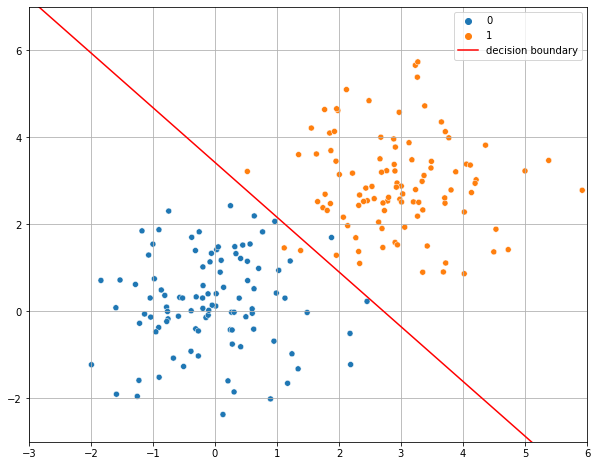

In [11]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(np.vstack([x,y]).T,l)
xx = np.linspace(-3,6)
yy = -lr.coef_[0][0]/lr.coef_[0][1]*xx-lr.intercept_/lr.coef_[0][1]
plt.figure(figsize=(10,8))
sns.scatterplot(x=x,y=y,hue=l)
plt.xlim([-3,6])
plt.ylim([-3,7])
plt.plot(xx,yy,'r', label='decision boundary')
plt.legend()
plt.grid()
plt.show()

As can be seen, the decision boundary found by a logistic regressor is a
line. This is because **a logistic regressor is a linear classifier**,
despite the logistic function is not linear!

## Estimation of the Parameters of a Logistic Regressor

To fit the model and find suitable values for the $\mathbf{\beta_i}$
parameters, we will define a **cost function**, similarly to what we have
done in the case of linear regression. 

Even if we can see the logistic
regression problem as the linear regression problem of fitting the
$logit(p) = \mathbf{\beta}^{T}\mathbf{x}$ function, differently from
linear regression, **we should note that we do not have the ground truth probabilities p**. 
Indeed, our observations only provide input examples
$\mathbf{x}^{(i)}$ and the corresponding labels $y^{(i)}$.

Starting from the definition:

$$P\left( y = 1 \middle| \mathbf{x}; \mathbf{\beta} \right) = f_{\mathbf{\beta}}\left( \mathbf{x} \right) = \frac{1}{1 + e^{- \mathbf{\beta}^{T}\mathbf{x}}} = \sigma(\mathbf{\beta}^{T}\mathbf{x})$$

We can write:

$$P\left( y = 1 \middle| \mathbf{x};\mathbf{\beta} \right) = f_{\mathbf{\beta}}(\mathbf{x})$$

$$P\left( y = 0 \middle| \mathbf{x};\mathbf{\beta} \right) = 1 - f_{\mathbf{\beta}}(\mathbf{x})$$

Since $y$ can only take values $0$ and $1$, this can also be written as follows in a more compact form:

$$P\left( y \middle| \mathbf{x};\mathbf{\beta} \right) = \left( f_{\mathbf{\beta}}\left( \mathbf{x} \right) \right)^{y}\left( 1 - f_{\mathbf{\beta}}\left( \mathbf{x} \right) \right)^{1 - y}$$

Indeed, when $y = 1$, the second factor is equal to $1$ and the
expression reduces to
$P\left( y = 1 \middle| \mathbf{x};\mathbf{\beta} \right) = f_{\mathbf{\beta}}(\mathbf{x})$.
Similarly, if $y = 0$, the first factor is equal to $1$ and the
expression reduces to $1 - f_{\mathbf{\beta}}(x)$.

We can estimate the parameters by maximum likelihood, i.e., choosing the
values of the parameters which maximize the probability of the data
under the model identified by the parameters $\mathbf{\beta}$:

$$L\left( \mathbf{\beta} \right) = P(Y|X;\mathbf{\beta})$$

If we assume that the training examples are all independent, the
likelihood can be expressed as:

$$L\left( \mathbf{\beta} \right) = \prod_{i = 1}^{N}{P(y^{(i)}|\mathbf{x}^{(i)};\mathbf{\beta})} = \prod_{i = 1}^{N}{f_{\mathbf{\beta}}\left( \mathbf{x}^{(i)} \right)^{y^{(i)}}\left( 1 - f_{\mathbf{\beta}}\left( \mathbf{x}^{(i)} \right) \right)^{{1 - y}^{(i)}}}$$

Maximizing this expression is equivalent to minimizing the negative
logarithm of $L(\mathbf{\beta})$ (negative log-likelihood - nll):

$$nll\left( \mathbf{\beta} \right) = - \log{L\left( \mathbf{\beta} \right)} = - \sum_{i = 1}^{N}{\log\left\lbrack f_{\mathbf{\beta}}\left( \mathbf{x}^{(i)} \right)^{y^{(i)}}\left( 1 - f_{\mathbf{\beta}}\left( \mathbf{x}^{(i)} \right) \right)^{{1 - y}^{(i)}} \right\rbrack} =$$

$$= - \sum_{i = 1}^{N}{\lbrack y^{(i)}\log{f_{\mathbf{\beta}}\left( \mathbf{x}^{(i)} \right)}} + \left( 1 - y^{(i)} \right)\log{(1 - f_{\mathbf{\beta}}\left( \mathbf{x}^{(i)} \right)})\rbrack$$

Hence, we will define our cost function as:

$$J\left( \mathbf{\beta} \right) = - \sum_{i = 1}^{N}{\lbrack y^{(i)}\log{f_{\mathbf{\beta}}\left( \mathbf{x}^{(i)} \right)}} + \left( 1 - y^{(i)} \right)\log{(1 - f_{\mathbf{\beta}}\left( \mathbf{x}^{(i)} \right)})\rbrack$$

This can be rewritten more explicitly in terms of the $\mathbf{\beta}$
parameters as follows:

$$J\left( \mathbf{\beta} \right) = - \sum_{i = 1}^{N}{\lbrack y^{(i)}\log{\sigma\left( {\mathbf{\beta}^{T}\mathbf{x}}^{(i)} \right)}} + \left( 1 - y^{(i)} \right)\log{(1 - \sigma\left( \mathbf{\beta}^{T}\mathbf{x}^{(i)} \right)})\rbrack$$

Similarly to linear regression, we now have a cost function to minimize in order to find the values of the $\beta_i$ parameters. Unfortunately, in this case, $J(\mathbf{\beta})$ assumes a nonlinear form **which prevents us to use the least square principles** and **there is no closed form solution for the parameter estimation**. In these cases, parameters can be estimated using some form of **iterative solver**, which begins with an initial guess for the parameters and iteratively refine them to find the final solution. Luckily, the logistic regression cost function **is convex, and hence only a single solution is admitted, independently from the initial guess**.

Different iterative solvers can be used in practice. The most commonly used is the **gradient descent algorithm**, which requires the cost function to be differentiable. We will not see this algorithm in details, but an introduction to it and its application to the estimation of the parameters of a logistic regressor are given in the following (hidden) section.

```{toggle}
## Estimating the Parameters of a Logistic Regressor through Gradient Descent

Given the cost function $J(\mathcal{\beta})$ above, we want to find suitable values $\mathbf{\beta}$ by
solving the following optimization problem:

$$\mathbf{\beta} = \arg_{\mathbf{\beta}}\min{J(\mathbf{\beta})}$$

As we already discussed, since $J$ is nonlinear, we cannot find a closed form solution for the estimation of the parameters.

Alternatively, we could **compute**
$\mathbf{J}\left( \mathbf{\beta} \right)$ **for all possible values
of** $\mathbf{\beta}$ **and choose the values of** $\mathbf{\beta}$
**which minimizes the cost**. However, this option is unfeasible in
practice as $\beta$ may assume an infinite number of values. Hence, we
need a way to **find the values of** $\mathbf{\beta}$ **which
minimize** $\mathbf{J(}\mathbf{\beta}\mathbf{)}$ **without computing**
$\mathbf{J(}\mathbf{\beta}\mathbf{)}$ **for all possible values of**
$\mathbf{\beta}$**.**

In these cases, we can use **gradient descent**, a numerical optimization strategy
which allows to **minimize differentiable functions** with respect
to their parameters.

We will introduce the gradient descent algorithm considering initially
the problem of minimizing a function of a single variable $J(\theta)$.
We will then extend to the case of multiple variables.

**The gradient descent algorithm is based on the observation that, if a
function** $J(\theta)$ *is defined and differentiable in a neighborhood
of a point* $\theta^{(0)}$*, then* $J(\theta)$ *decreases fastest if one
goes from* $\theta^{(0)}$ *towards the direction of the negative
derivative of* $J$ *computed in* $\theta^{(0)}$*.* Consider the function
$J(\theta)$ shown in the plot below:


In these cases, we can use **gradient descent**, a numerical optimization strategy
which allows to **minimize differentiable functions** with respect
to their parameters.

We will introduce the gradient descent algorithm considering initially
the problem of minimizing a function of a single variable $J(\theta)$.
We will then extend to the case of multiple variables.

**The gradient descent algorithm is based on the observation that, if a
function** $J(\theta)$ *is defined and differentiable in a neighborhood
of a point* $\theta^{(0)}$*, then* $J(\theta)$ *decreases fastest if one
goes from* $\theta^{(0)}$ *towards the direction of the negative
derivative of* $J$ *computed in* $\theta^{(0)}$*.* Consider the function
$J(\theta)$ shown in the plot below:

![](/_static/lecture_specific/gradient_descent/gd1.png)

Let us assume that we are at the initial point $\theta^{(0)}$. From the
plot, we can see that we should move to the right part of the x axis in
order to reach the minimum of the function.

![](/_static/lecture_specific/gradient_descent/gd2.png)


The first derivative of the function in that point $J'(\beta^{(0)})$
will be equal to the angular coefficient of the tangent to the curve in
the point $(\theta^{(0)},J\left( \theta^{(0)} \right))$. Since the curve
is decreasing in a neighborhood of $\beta^{(0)}$, the tangent line will
also be decreasing. Therefore, its angular coefficient
$J'(\theta^{(0)})$ will be negative. If we want to move to the right, we
should follow in the *inverse direction* of the derivative of the curve
in that point.

The gradient descent is an iterative algorithm; hence we are not trying
to reach the minimum of the function in one step. Instead, we would like
to move to another point $\theta^{(1)}$ such that
$J\left( \theta^{(1)} \right) < J(\theta^{(0)})$. If we can do this for
every point, we can reach the minimum in a number of steps.

At each step, we will move proportionally to the value of the
derivative. This is based on the observation that larger absolute values
of the derivative indicate steeper curves. If we choose a multiplier
factor $\gamma$, we will move to the point:

$$\theta^{(1)} = \theta^{(0)} - \gamma J'(\theta^{(0)})$$

For instance, if we choose $\gamma = 0.02$, we will move to point
$\theta^{(1)} = 0.4 + 0.02 \cdot 1.8 = 0.436$. The procedure works
iteratively until the derivative is so small that no movement is
possible, as shown in the following figure:

![](/_static/lecture_specific/gradient_descent/gd3.png)

In the next step, we compute the derivative of the function in the
current point $J\left( \beta^{(1)} \right) = - 0.8$ and move to point
$\beta^{(2)} = \beta_{1} - \gamma J'(\beta^{(1)})$.

![](/_static/lecture_specific/gradient_descent/gd4.png)


Next, we compute the derivative of the function in the current point
$f\left( \theta^{(2)} \right) = - 0.4$ and move to point
$\theta^{(3)} = \theta^{(2)} - \gamma J'(\theta^{(2)})$:

![](/_static/lecture_specific/gradient_descent/gd5.png)


We then compute the derivative of the current point
$J\left( \theta^{(3)} \right) \approx 0$:

![](/_static/lecture_specific/gradient_descent/gd6.png)


This derivative is so small that we cannot advance further. We are in a
local minimum. The optimization terminates here. We have found the value
$\theta^{(3)} = \arg_{\theta}\min{J(\theta)}$.

In practice, the algorithm is terminated following a **given termination
criterion**. Two common criteria are:

-   A maximum number of iterations is reached.

-   The value $\gamma J'(\theta)$ is below a given threshold.


### Global vs Local Minima

It is important to note that gradient descent can be applied only if the
cost function is **differentiable with respect to its parameters**.
Moreover, the algorithm is guaranteed to converge to the global minimum
**only if the cost function is convex**. In the general case of
non-convex loss function, the algorithm may converge to a **local
minimum**, which may represent a **suboptimal solution**. Nevertheless,
when the number of parameters is very large, gradient descent **usually
finds a good enough solution**, even if it only converges to a local
minimum.


### One Variable

The gradient descent algorithm can be written in the following form in
the case of one variable:

1.  Choose an initial random point $\beta$;

2.  Compute the first derivative of the function $J'$ in the current
    point $\theta$: $J'(\theta)$;

3.  Update the position of the current point using the formula
    $\theta = \theta - \gamma J'(\theta)$;

4.  Repeat 2-3 until some termination criteria are met.


### Multiple Variables

The gradient descent algorithm generalizes to the case in which the
function $J$ to optimize depends on multiple variables
$J(\theta_{1},\theta_{2},\ldots,\theta_{n})$.

For instance, let's consider a function of two variables
$J(\theta_{1},\theta_{2})$. We can plot such function as a 3D plot
(left) or as a contour plot (right). In both cases, our goal is to reach
the point with the minimum value (the 'center' of the two plots). Given
a point $\mathbf{\theta} = (\theta_{1},\theta_{2})$, the direction of
steepest descent is the **gradient** of the function in the point.

![](/_static/lecture_specific/gradient_descent/gd7.png)


The gradient is a multi-variable generalization of the derivative. The
gradient of a function of $n$ variable computed in a point
$\mathbf{\theta}$ is a vector whose $i^{th}$ variable is given by the
partial derivative of the function with respect to the $i^{th}$
variable:

$$\nabla J\left( \mathbf{\theta} \right) = \begin{pmatrix}
J_{\theta_{1}}(\mathbf{\theta}) \\
J_{\theta_{2}}(\mathbf{\theta}) \\
\begin{matrix}
\ldots \\
J_{\theta_{n}}(\mathbf{\theta}) \\
\end{matrix} \\
\end{pmatrix}$$

In the case of two variables, the gradient will be a 2D vector (the
gradient) indicating the direction to follow. Since in general we want
to optimize multi-variable functions, the algorithm is called 'gradient
descent'.

The following figure shows an example of an optimization procedure to
reach the center of the curve from a given starting point:

![](/_static/lecture_specific/gradient_descent/gd8.png)

The pseudocode of the procedure, in the case of the multiple variables
is as follows:

1.  Initialize
    $\mathbf{\theta} = (\theta_{1},\theta_{2},\ldots,\theta_{n})$
    randomly.

2.  For each variable $x_{i}$:

3.  Compute the partial derivative at the point:

4.  $\frac{\partial}{\partial\theta_{i}}J\left( \mathbf{\theta} \right)$

5.  Update the current variable using the formula:

$$\theta_{i} = \theta_{i} - \gamma\frac{\partial}{\partial\theta_{i}}J(\mathbf{\theta})$$

6.  Repeat 2-3 until the termination criteria are met.

### Logistic Regression and Gradient Descent
It can be shown that, in the case of the logistic regressor, the update rule will be:

$$\beta_{j}\mathbf{=}\beta_{j}\mathbf{-}\gamma\sum_{i = 1\ }^{N}{x_{j}^{(i)}\left( \sigma\left( \mathbf{\beta}^{T}\mathbf{x}^{(i)} \right) - y^{(i)} \right)}$$

For the most curious, the details are in the following section.

#### Derivation of the Update Rule

Let us first consider the derivative of the logistic function:

$$\sigma(x) = \frac{1}{1 + e^{- x}}$$

This will be:

$\sigma^{'}(x) = - \frac{1}{\left( 1 + e^{- x} \right)^{2}}D\left\lbrack e^{- x} \right\rbrack = \frac{e^{- x}}{\left( 1 + e^{- x} \right)^{2}}$
\[Applying the rule
$D\left\lbrack \frac{1}{f(x)} \right\rbrack = - \frac{D\left\lbrack f(x) \right\rbrack}{f(x)^{2}}$\]

$\sigma^{'}(x) = \frac{1 + e^{- x} - 1}{\left( 1 + e^{- x} \right)^{2}}$
\[Summing and subtracting $1$ to the numerator\]

$\sigma^{'}(x) = \frac{1 + e^{- x}}{\left( 1 + e^{- x} \right)^{2}} - \frac{1}{\left( 1 + e^{- x} \right)^{2}}$
\[Splitting the numerator in two terms\]

$\sigma^{'}(x) = \frac{1}{1 + e^{- x}}\left( 1 - \frac{1}{1 + e^{- x}} \right)$
\[making the $\frac{1}{1 + e^{- x}}$ factor explicit\]

$\sigma^{'}(x) = \sigma(x)\left( 1 - \sigma(x) \right)$ \[replacing the
formula $\sigma(x) = \frac{1}{1 + e^{- x}}$\]

##### Partial Derivatives of the Cost Function

We now need to obtain the partial derivatives of the cost function with
respect to the j-th parameter:

$$\frac{\partial J\left( \mathbf{\beta} \right)}{\partial\beta_{j}}$$

Remember that the cost function is defined as:

$$J\left( \mathbf{\beta} \right) = - \sum_{i = 1}^{N}{y^{(i)}\log{\sigma\left( {\mathbf{\beta}^{T}\mathbf{x}}^{(i)} \right)}} + \left( 1 - y^{(i)} \right)\log{(1 - \sigma\left( \mathbf{\beta}^{T}\mathbf{x}^{(i)} \right)})$$

Let us first compute the derivative of the first term of the addition:

$\frac{\partial}{\partial\beta_{j}}y^{(i)}\log{\sigma\left( {\mathbf{\beta}^{T}\mathbf{x}}^{(i)} \right)}$
\[Initial expression\]

$= y^{(i)}\frac{1}{\sigma\left( {\mathbf{\beta}^{T}\mathbf{x}}^{(i)} \right)}\frac{\partial}{\beta_{j}}\left\lbrack \sigma\left( {\mathbf{\beta}^{T}\mathbf{x}}^{(i)} \right) \right\rbrack$
\[Applying
$D\left\lbrack \log\left( f(x) \right) \right\rbrack = \frac{1}{f(x)}f'(x)$\]

$= y^{(i)}\frac{1}{\sigma\left( {\mathbf{\beta}^{T}\mathbf{x}}^{(i)} \right)}\sigma\left( {\mathbf{\beta}^{T}\mathbf{x}}^{(i)} \right)\left( 1 - \sigma\left( {\mathbf{\beta}^{T}\mathbf{x}}^{(i)} \right) \right)\frac{\partial}{\beta_{j}}\left\lbrack {\mathbf{\beta}^{T}\mathbf{x}}^{(i)} \right\rbrack$
\[Applying
$\sigma^{'}\left( f(x) \right) = \sigma\left( f(x) \right)\left( 1 - \sigma\left( f(x) \right) \right)f'(x)\rbrack$

$= y^{(i)}\frac{1}{\sigma\left( {\mathbf{\beta}^{T}\mathbf{x}}^{(i)} \right)}\sigma\left( {\mathbf{\beta}^{T}\mathbf{x}}^{(i)} \right)\left( 1 - \sigma\left( {\mathbf{\beta}^{T}\mathbf{x}}^{(i)} \right) \right)x_{j}^{(i)}$
\[Applying
$\frac{\partial}{\beta_{j}}\left\lbrack {\mathbf{\beta}^{T}\mathbf{x}}^{(i)} \right\rbrack = x_{j}$\]

The derivative of the second term will be:

$\frac{\partial}{\partial\beta_{j}}{(1 - y}^{(i)})\log\left( 1 - \sigma\left( {\mathbf{\beta}^{T}\mathbf{x}}^{(i)} \right) \right)$
\[Initial Expression\]

$= \left( 1 - y^{(i)} \right)\frac{1}{1 - \sigma\left( {\mathbf{\beta}^{T}\mathbf{x}}^{(i)} \right)}\frac{\partial}{\beta_{j}}\ \lbrack 1 - \sigma\left( {\mathbf{\beta}^{T}\mathbf{x}}^{(i)} \right)\rbrack$
\[Applying
$D\left\lbrack \log\left( f(x) \right) \right\rbrack = \frac{1}{f(x)}f'(x)$\]

$= \left( 1 - y^{(i)} \right)\frac{1}{1 - \sigma\left( {\mathbf{\beta}^{T}\mathbf{x}}^{(i)} \right)}( - 1)\sigma\left( \mathbf{\beta}^{T}\mathbf{x}^{(i)} \right)\left( 1 - \sigma\left( \mathbf{\beta}^{T}x^{(i)} \right) \right)x_{j}^{(i)}$
\[Applying $\sigma(x)\left( 1 - \sigma(x) \right)$ and
$\frac{\partial}{\beta_{j}}\left\lbrack {\mathbf{\beta}^{T}\mathbf{x}}^{(i)} \right\rbrack = x_{j}$\]

$= \frac{y^{(i)} - 1}{1 - \sigma\left( {\mathbf{\beta}^{T}\mathbf{x}}^{(i)} \right)}\sigma\left( \mathbf{\beta}^{T}\mathbf{x}^{(i)} \right)\left( 1 - \sigma\left( \mathbf{\beta}^{T}x^{(i)} \right) \right)x_{j}^{(i)}$
\[Simplifying\]

We can write the sum of the last two derivatives as follows:

$\frac{\partial}{\partial\beta_{j}}y^{(i)}\log{\sigma\left( {\mathbf{\beta}^{T}\mathbf{x}}^{(i)} \right)} + \frac{\partial}{\partial\beta_{j}}{(1 - y}^{(i)})\log\left( 1 - \sigma\left( {\mathbf{\beta}^{T}\mathbf{x}}^{(i)} \right) \right)$
\[Initial Expression\]

$= \frac{y^{(i)}}{\sigma\left( {\mathbf{\beta}^{T}\mathbf{x}}^{(i)} \right)}\sigma\left( {\mathbf{\beta}^{T}\mathbf{x}}^{(i)} \right)\left( 1 - \sigma\left( {\mathbf{\beta}^{T}\mathbf{x}}^{(i)} \right) \right)x_{j}^{(i)} + \frac{y^{(i)} - 1}{1 - \sigma\left( {\mathbf{\beta}^{T}\mathbf{x}}^{(i)} \right)}\sigma\left( \mathbf{\beta}^{T}\mathbf{x}^{(i)} \right)\left( 1 - \sigma\left( \mathbf{\beta}^{T}x^{(i)} \right) \right)x_{j}^{(i)}$
\[Replacing derivatives\]

$= \sigma\left( {\mathbf{\beta}^{T}\mathbf{x}}^{(i)} \right)\left( 1 - \sigma\left( {\mathbf{\beta}^{T}\mathbf{x}}^{(i)} \right) \right)x_{j}^{(i)}\left\lbrack \frac{y^{(i)}}{\sigma\left( {\mathbf{\beta}^{T}\mathbf{x}}^{(i)} \right)} + \frac{y^{(i)} - 1}{1 - \sigma\left( {\mathbf{\beta}^{T}\mathbf{x}}^{(i)} \right)} \right\rbrack$
\[Simplifying\]

$= \sigma\left( {\mathbf{\beta}^{T}\mathbf{x}}^{(i)} \right)\left( 1 - \sigma\left( {\mathbf{\beta}^{T}\mathbf{x}}^{(i)} \right) \right)x_{j}^{(i)}\left\lbrack \frac{y^{(i)}\left( 1 - \sigma\left( {\mathbf{\beta}^{T}\mathbf{x}}^{(i)} \right) \right) + (y^{(i)} - 1)\sigma\left( {\mathbf{\beta}^{T}\mathbf{x}}^{(i)} \right)}{\sigma\left( {\mathbf{\beta}^{T}\mathbf{x}}^{(i)} \right)\left( 1 - \sigma\left( {\mathbf{\beta}^{T}\mathbf{x}}^{(i)} \right) \right)} \right\rbrack$
\[Simplifying\]

$= \frac{\sigma\left( {\mathbf{\beta}^{T}\mathbf{x}}^{(i)} \right)\left( 1 - \sigma\left( {\mathbf{\beta}^{T}\mathbf{x}}^{(i)} \right) \right)}{\sigma\left( {\mathbf{\beta}^{T}\mathbf{x}}^{(i)} \right)\left( 1 - \sigma\left( {\mathbf{\beta}^{T}\mathbf{x}}^{(i)} \right) \right)}x_{j}^{(i)}\left\lbrack y^{(i)}\left( 1 - \sigma\left( {\mathbf{\beta}^{T}\mathbf{x}}^{(i)} \right) \right) + (y^{(i)} - 1)\sigma\left( {\mathbf{\beta}^{T}\mathbf{x}}^{(i)} \right) \right\rbrack$
\[Simplifying\]

$= x_{j}^{(i)}\left\lbrack y^{(i)} - y^{(i)}\sigma\left( {\mathbf{\beta}^{T}\mathbf{x}}^{(i)} \right) + y^{(i)}\sigma\left( {\mathbf{\beta}^{T}\mathbf{x}}^{(i)} \right) - \sigma\left( {\mathbf{\beta}^{T}\mathbf{x}}^{(i)} \right) \right\rbrack$
\[Simplifying\]

$= x_{j}^{(i)}\left( y^{(i)} - \sigma\left( {\mathbf{\beta}^{T}\mathbf{x}}^{(i)} \right) \right)$
\[Simplifying\]

The derivative of the cost function with respect to the j-th parameter
will hence be:

$$\frac{\partial J\left( \mathbf{\beta} \right)}{\partial\beta_{j}} = - \sum_{i = 1}^{N}{\frac{\partial}{\partial\beta_{j}}y^{(i)}\log{\sigma\left( {\mathbf{\beta}^{T}\mathbf{x}}^{(i)} \right)} + \frac{\partial}{\partial\beta_{j}}{(1 - y}^{(i)})\log\left( 1 - \sigma\left( {\mathbf{\beta}^{T}\mathbf{x}}^{(i)} \right) \right)} = \sum_{i}^{N}{x_{j}^{(i)}\left( y^{(i)} - \sigma\left( \beta^{T}x^{(i)} \right) \right)}$$

The gradient descent update rule for each parameter will be:

$$\beta_{j}\mathbf{=}\beta_{j}\mathbf{-}\gamma\sum_{i = 1\ }^{N}{x_{j}^{(i)}\left( \sigma\left( \mathbf{\beta}^{T}\mathbf{x}^{(i)} \right) - y^{(i)} \right)}$$

```

## Example of Logistic Regression

Let us now apply logistic regression to a larger set of variables in our regression problem. We will consider the following independent variables:
* `radius1`
* `texture1`
* `perimeter1`
* `area1`
* `smoothness1`
* `compactness1`
* `concavity1`
* `symmetry1`

The dependent variable is again `Diagnosis`.

Once fit to the data, we will obtain the following parameters:

|$R^2$|Adj. $R^2$|F-statistic|Prob(F-statistic)|Log-Likelihood|
|-|-|-|-|-|
|0.670|0.666|142.4|1.16e-129|-78.055|

All values have interpretations similar to the ones obtained in the case of linear regression. The Log-Likelihood reports the value of the logarithm of the likelihood which was used to train the data.

The estimates for the coefficients are as follows:

In [17]:
ols("Diagnosis ~ radius1 + texture1 + perimeter1 + area1 + smoothness1 + compactness1 + concavity1 + symmetry1",data).fit().summary().tables[1]

,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,-2.6591,0.224,-11.896,0.000,-3.098,-2.220
radius1,0.4688,0.133,3.532,0.000,0.208,0.730
texture1,0.0219,0.003,7.376,0.000,0.016,0.028
perimeter1,-0.0473,0.021,-2.272,0.023,-0.088,-0.006
area1,-0.0009,0.000,-3.985,0.000,-0.001,-0.000
smoothness1,5.1389,1.221,4.208,0.000,2.740,7.538
compactness1,0.3080,0.854,0.360,0.719,-1.370,1.986
concavity1,2.0973,0.414,5.065,0.000,1.284,2.911
symmetry1,1.2739,0.568,2.244,0.025,0.159,2.389


We notice that not all variables have a statistically relevant relationship with the dependent variable. Applying backward elimination, we remove `compactness1` and obtain the following estimates:

In [18]:
ols("Diagnosis ~ radius1 + texture1 + perimeter1 + area1 + smoothness1 + concavity1 + symmetry1",data).fit().summary().tables[1]

,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,-2.6708,0.221,-12.086,0.000,-3.105,-2.237
radius1,0.4360,0.097,4.517,0.000,0.246,0.626
texture1,0.0219,0.003,7.405,0.000,0.016,0.028
perimeter1,-0.0419,0.014,-2.915,0.004,-0.070,-0.014
area1,-0.0010,0.000,-4.477,0.000,-0.001,-0.001
smoothness1,5.3093,1.125,4.719,0.000,3.099,7.519
concavity1,2.1479,0.389,5.517,0.000,1.383,2.913
symmetry1,1.3132,0.557,2.359,0.019,0.220,2.407


These are now all statistically relevant. For instance, we can see that:
* When all variables are set to zero, the odds of the benign tumor are $e^{-2.6708} \approx 0.07$, or $\frac{7}{100}$. This is a base value.
* An increment in one unit of `texture1` increments the odds of a benign tumor multiplicatively by a factor of $e^{0.0219} \approx 1.02$ (a +$2\%$).
* An increment of one unit of `perimeter1` decrements the odds of benign tumor multiplicatively by a factor of $e^{-0.0419} \approx 0.96$ (a -$4\%$).

## Multinomial Logistic Regression

In many cases, we want to study the relationship between a set of **continuous or categorical independent variable and a non-binary categorical dependent variable**. 

### The Iris Dataset
An example is given by Fisher's Iris dataset.

The dataset was introduced by Ronald Fisher in 1936 and contains observations related to 150 specimens of iris flowers belonging to 3 different species: "setosa", "versicolor", and "virginica". Example images of the three flowers are given below:

![](/_static/lecture_specific/iris/iris.png)

For each of the observations, the dataset provides measurements of 4 physical characteristics (length and width of sepals and petals), as illustrated in the image below:

![](/_static/lecture_specific/iris/sepal_petal.png)

All the variables in the dataset are numeric, except for `species`, which is categorical. Here are some observations from the dataset:

In [28]:
import seaborn as sns
iris = sns.load_dataset('iris')
iris

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


Looking at the scatterplots we can see how the measurements have different ranges (same units, all centimeters):

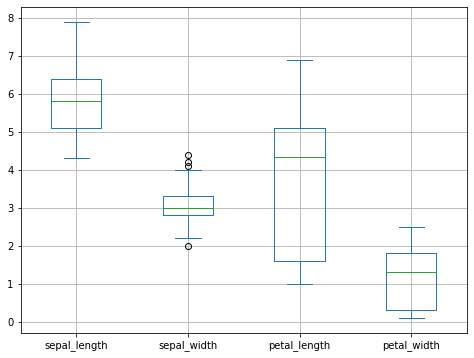

In [29]:
from matplotlib import pyplot as plt
iris.plot.box(figsize=(8,6))
plt.grid()
plt.show()

Let us observe the scatter matrix

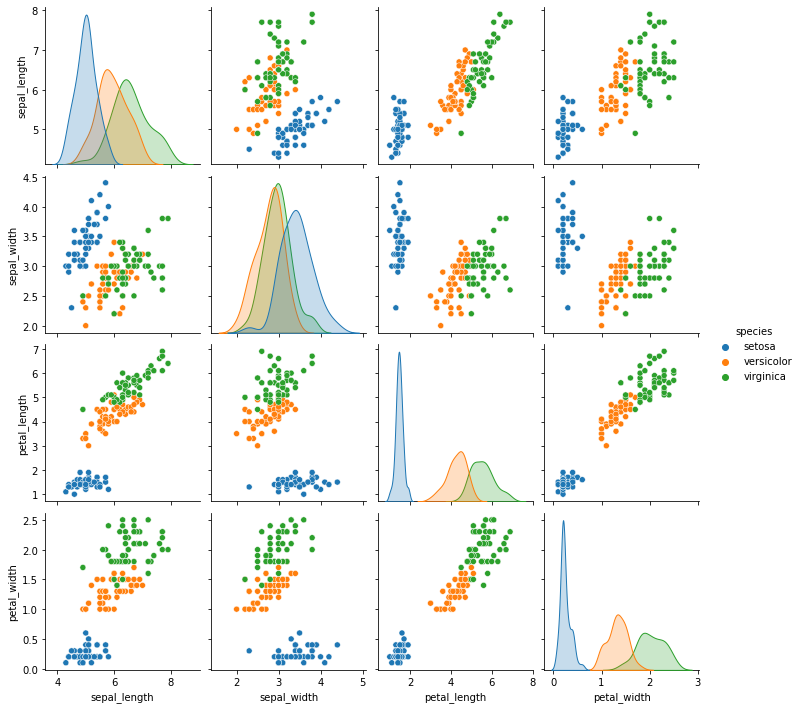

In [34]:
sns.pairplot(iris, hue='species')
plt.plot()
plt.show()

### Additional Limitations of a Linear Regression in the Presence of More than Two Classes

Let us consider again a case with a single independent feature. We will select `petal_length`. The following image plots it with respect to the three classes:

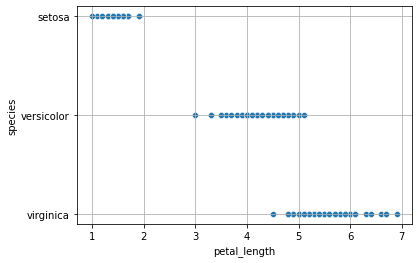

In [38]:
sns.scatterplot(x='petal_length', y='species', data=iris)
plt.grid()
plt.show()

From the figure above, one may think that a linear regressor, even if not perfect, could still be an option. However, **to fit a linear regressor, we should first convert species values to numeric values**. A possible outcome could be:

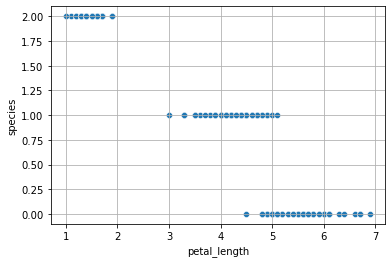

In [42]:
iris2 = iris.copy(); 
iris2['species'] = iris2['species'].replace({'setosa':2, 'versicolor':1, 'virginica':0})
sns.scatterplot(x='petal_lerngth', y='species', data=iris2)
plt.grid()
plt.show()

However, also the following mapping would be valid:

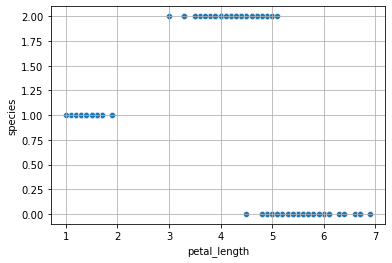

In [44]:
iris2 = iris.copy(); 
iris2['species'] = iris2['species'].replace({'setosa':1, 'versicolor':2, 'virginica':0})
sns.scatterplot(x='petal_length', y='species', data=iris2)
plt.grid()
plt.show()

Even if the two mappings should be equivalent, we can see how a linear model would find very different results.

This is an example of how the linear model is **even more limited when more than two possible outcomes of the dependent variable are possible**.

### The Multinomial Logistic Regression Model
When the dependent variable can assume more than two values, **we can define the multinomial logistic regression model**. In this case, we select one fo the values of the dependent variable $Y$ as **a baseline class**. Without loss of generality, let $K$ be the number of classes and let $Y=1$ be the baseline class. Recall that in the case of the logistic regressor, we modeled the logarithm of the odd as our linear function:

$$\log \left(\frac{P(y=1|\mathbf{x})}{1-P(y=1|\mathbf{x})}\right) = \beta_0 + \beta_1 x_1 + \ldots + \beta_n x_n$$

Since we have more than one possible outcomes for the dependent variable, rather than modeling the odds, a multinomial logistic regressor models the logarithm of the ratio between a given class $k$ and the baseline class $0$ as follows:

$$\log\left( \frac{P(Y=k|X=\mathbf{x})}{P(Y=1|X=\mathbf{x})} \right) = \beta_{k0} + \beta_{k1} x_1 + \ldots + \beta_{kn} x_n$$

Note that, in practice, we need to define a different linear function for each class $k = 1 \ldots K$, hence we need $(n+1) \times (k-1)$ parameters.


Let $P(k)=(Y=k|X=\mathcal{x})$ for brevity, $\mathbf{\beta_k}=(\beta_0,\beta_1,\ldots,\beta_k)$ and $\mathbf{X}=(1,x_1,\ldots,x_n)$. We can see that:

$$\log\left(\frac{P(k)}{P(1)}\right) = \mathbf{\beta_k}^T\mathbf{X} \Rightarrow P(k)= e^{\mathbf{\beta_k}^T\mathbf{X}} P(1) = $$

We can divide the last term by $1=\sum_{l=1}^K P(l)$:

$$ P(k) = \frac{e^{\mathbf{\beta_k}^T\mathbf{X}} P(1)}{\sum_{l=1}^K P(l)} = \frac{e^{\mathbf{\beta_k}^T\mathbf{X}}}{\sum_{l=1}^K \frac{P(l)}{P(1)}} = \frac{e^{\mathbf{\beta_k}^T\mathbf{X}}}{\frac{P(1)}{P(1)}+\sum_{l=2}^K \frac{P(l)}{P(1)}} = \frac{e^{\mathbf{\beta_k}^T\mathbf{X}}}{1+\sum_{l=2}^K \mathbf{\beta_l^T\mathbf{X}}} \text{   (A)}$$

Note that the expression above can also be seen as:

$$ P(k) = \frac{\log\left(\frac{P(k)}{P(1)}\right)}{1+\sum_{l=2}^K \mathbf{\beta_l^T\mathbf{X}}}$$

Hence:

$$ P(1) = \frac{1}{1+\sum_{l=2}^K \mathbf{\beta}_l^T\mathbf{X}} \text{   (B)}$$

We can rewrite the results (A) and (B) in the full form:

$$ P(Y=k|X=\mathbf{x}) = \frac{e^{\mathbf{\beta_k}^T\mathbf{X}}}{1+\sum_{l=2}^K \mathbf{\beta_l^T\mathbf{X}}}$$
$$ P(Y=1|X=\mathbf{x}) = \frac{1}{1+\sum_{l=2}^K \mathbf{\beta_l^T\mathbf{X}}}$$

These two expressions can be used to compute the probabilities of the classes once that the parameters have been estimated and $\mathcal{x}$ is observed.

#### Estimating the Parameters of the Multinomial Logistic Regressor Model
We can estimate the paramters of the multinomial logistic regressor model again by maximizing the likelihood of the model on the data. Assuming that all observations are i.i.d., we can write:

$$L(\mathbf{\beta}) = \prod_{i=1}^N P(Y=y^{(i)}|X=\mathbf{x}^{(i)};\mathbf{\beta})$$

Again, we minimize the negative log likelihood:

$$nll(\mathcal{\beta})=-\log L(\mathbf{\beta}) = -\sum_{i=1}^N \log P(Y=y^{(i)}|X=\mathbf{x}^{(i)};\mathbf{\beta}) = -\sum_{i=1}^N [y^{(i)} \neq 1](e^{-\mathbf{\beta}_k^T\mathbf{X}} - \log(1+\sum_{l=2}^K {\beta}_k^T\mathbf{X})) + [y^{(i)} = 1] (- \log(1+\sum_{l=2}^K {\beta}_k^T\mathbf{X}))$$

Where $[\cdot]$ denotes the Iverson brackets:

$$[x] = \begin{cases}1 & \text{if } x \text{ is true} \\ 0 & \text{otherwise}\end{cases}$$

Similarly to the logistic regressor, there is no close form for the estimation of the parameters, but iterative algorithms such as **gradient descent** are in general used for optimization.

#### Interpretation of the Parameters of a Multinomial Logistic Regressor
The statistical interpretation of the parameters of a multinomial logistic regressor is similar to the one of a logistic regressor, but we should pay attention to the choice of the baseline. 

Let us consider our example of studying the relationship between `sepal_lenght` and `species`. We will map `virginica` to $0$, `versicolor` to $1$ and `setosa` to $2$. Once the model is fit, we will find the following values:

|Pseudo $R^2$|LogLikelihood| LLR p-value|
|-|-|-|
|0.4476|-91.034|9.276e-33|

The value of LLR p-value is telling us that the model is statistically relevant, even if the pseudo $R^2$ is not very high. The relationship is not completely explained by the multinomial logistic regressor.

The coefficients will be as follows:

In [52]:
from statsmodels.formula.api import mnlogit
iris2 = iris.copy(); 
iris2['species'] = iris2['species'].replace({'setosa':2, 'versicolor':1, 'virginica':0})
mnlogit("species ~ sepal_length", iris2).fit().summary().tables[1]

Optimization terminated successfully.
         Current function value: 0.606893
         Iterations 8


species=1,coef,std err,z,P>|z|,[0.025,0.975]
Intercept,12.6771,2.906,4.362,0.000,6.981,18.373
sepal_length,-2.0307,0.466,-4.361,0.000,-2.943,-1.118
species=2,coef,std err,z,P>|z|,[0.025,0.975]
Intercept,38.7590,5.691,6.811,0.000,27.605,49.913
sepal_length,-6.8464,1.022,-6.698,0.000,-8.850,-4.843


We can see that there are two sets of coefficients. One for `species=1` (versicolor) and one for `species=2` (setosa). No coefficients have been estimated for `virginica`, because it has been chosen as the baseline. We can see that all p-values are small, so we can keep all variables. Let us see how to interpret the coefficients:
* The intercept for `species=1` is $12.6771$. This indicates that the odd of `versicolor` versus `virginica` is $e^{12.6771}=320327.76$, when `sepal_length` is set to zero. This is a very large number, probably due to the fact that `sepal_lenght=0` is not a realistic observation.
* The intercept for `species=2` is $38.7590$. This indicates that the odd of `setosa` versus `virginica` is $e^{38.7590}=6.8e+16$, when `sepal_length` is set to zero. Also in this case, we obtain a very large number, probably due to the fact that `sepal_lenght=0` is not a realistic observation.
* The coefficient $-2.0307$ of `sepal_length` for `species=1` indicates that when we observe an increase in one centimeter of `sepal_length`, the odd of `versicolor` versus `virginica` decreases multiplicatively by $e^{-2.0307} = 0.13$ (a large -$87\%!).
* The coefficient $-6.8564$ of `sepal_length` for `species=2` indicates that when we observe an increase in one centimeter of `sepal_length`, the odd of `setosa` versus `virginica` decreases multiplicatively by $e^{-6.8464} = 0.001$ (a large -$99.9\%!).

#### The Softmax Regressor
Softmax regression is an alternative formulation of multinomial logistic regression which is designed to avoid the definition of a baseline and it is hence symmetrical. In a softmax regressor, the probabilities are modeled as follows:

$$ P(Y=k|X=\mathbf{x}) = \frac{e^{\mathbf{\beta_k}^T\mathbf{X}}}{1+\sum_{l=2}^K \mathbf{\beta_l^T\mathbf{X}}}, \ \ \ \forall k=1,\ldots,K$$

So, rather than estimating $K-1$ coefficients, we estimate $K$ coefficients.

The optimization of the model is performed defining a similar cost function and optimizing it with iterative methods.

The softmax formulation is widely used in predictive analysis and machine learning, but less pervasive in statistics.

## References
* Chapter $4$ of \[1\]

\[1\] James, Gareth Gareth Michael. An introduction to statistical learning: with applications in Python, 2023.https://www.statlearning.com